In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
import sys

In [75]:
# Load Image 

def read_file(filename):
    img = cv2.imread(filename)
    if img is None:
        print("Image Not Found. Please Recheck!")
        sys.exit()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    return img

In [108]:
filename = "./testimage.jpg"
img = read_file(filename)

In [55]:
# Create Edge Mask

def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

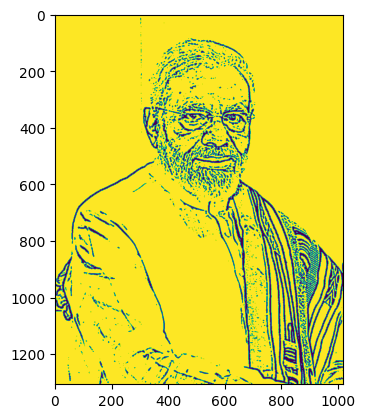

In [130]:
line_size, blur_value = 13,5
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges)

In [64]:
# Reduce the Color Pallete
def color_quantization(img, k):
    
    #Image transformation to work on it    
    data = np.asarray(img, dtype=float).reshape((-1,3))
    data = np.float32(data)

    #Determining Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

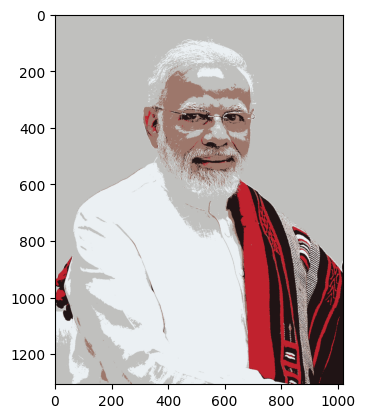

In [126]:
quantized_img = color_quantization(img, k=5)

plt.imshow(quantized_img)

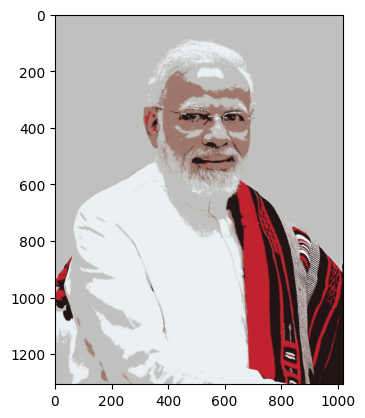

In [127]:
# Reduce Noise 

blurred = cv2.bilateralFilter(quantized_img, d=7, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)

In [68]:
#Combine Edge Mask with Quantized Image

def cartoonize():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    return c

Text(0.5, 1.0, 'Cartoonized Image')

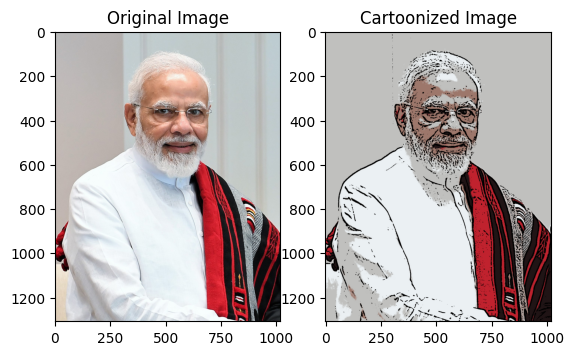

In [131]:
# Get the final cartoonized image

cartoon = cartoonize()
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original Image")
plt.subplot(1,2,2); plt.imshow(cartoon); plt.title("Cartoonized Image")